In [1]:
import numpy as np
from abcsmc import ABCSMC
import scipy
import astroabc

In [2]:
#make the fake data with diagonal covariance
means= np.array([0.037579, 0.573537])
cov = np.array([[.01,.005],[.005,.01]])
data = np.random.multivariate_normal(means, cov, size=1000)

In [3]:
#define a method for simulating the data given input parameters
def simulation(param):
    cov =np.array([[.01,.005],[.005,.01]])
    #Ideally do something with the pool here
    return np.random.multivariate_normal(param, cov, size=1000)

model_sim = simulation

In [4]:
def dist_metric(d,x):
    return np.sum(np.abs(np.mean(x,axis=0) - np.mean(d,axis=0)))

In [5]:
priors =  [('normal', [0.03,.5]), ('uniform', [0.1, 0.9])]

In [6]:
prop={'dfunc':dist_metric, 'outfile':"gaussian_example.txt", 'tol_type':"log",'verbose':1, 'adapt_t': True, 'pert_kernel':1}

In [7]:
sampler = ABCSMC(2,100,data,30,priors,model_sim,dist_metric,[0.5,0.002])

[0.5        0.48282759 0.46565517 0.44848276 0.43131034 0.41413793
 0.39696552 0.3797931  0.36262069 0.34544828 0.32827586 0.31110345
 0.29393103 0.27675862 0.25958621 0.24241379 0.22524138 0.20806897
 0.19089655 0.17372414 0.15655172 0.13937931 0.1222069  0.10503448
 0.08786207 0.07068966 0.05351724 0.03634483 0.01917241 0.002     ]


In [8]:
chains=sampler.sample()

	 Step: 0 	 tol: 0.5 	 Params: [0.054875641526553574, 0.5394420078059717]
	 Step: 1 	 epsilon_t: 0.48282758620689653 	 Params: [0.03907971819148222, 0.5631397969061112]
	 Step: 2 	 epsilon_t: 0.4656551724137931 	 Params: [0.056580985599751214, 0.5603922194122356]
	 Step: 3 	 epsilon_t: 0.44848275862068965 	 Params: [0.01873853208248033, 0.5776833526577149]
	 Step: 4 	 epsilon_t: 0.43131034482758623 	 Params: [-0.0017258512183003485, 0.5713113512699064]
	 Step: 5 	 epsilon_t: 0.41413793103448276 	 Params: [0.020018448353395862, 0.5548777122381057]
	 Step: 6 	 epsilon_t: 0.3969655172413793 	 Params: [0.03218514826548958, 0.5707503475556506]
	 Step: 7 	 epsilon_t: 0.3797931034482759 	 Params: [0.04597212276399049, 0.5562358067735504]
	 Step: 8 	 epsilon_t: 0.3626206896551724 	 Params: [0.02936101619496375, 0.5647474522589241]
	 Step: 9 	 epsilon_t: 0.34544827586206894 	 Params: [0.024941293306449574, 0.5832679907418065]
	 Step: 10 	 epsilon_t: 0.32827586206896553 	 Params: [0.042353291121

(array([ 2.,  6.,  7., 14., 21., 24., 11., 11.,  3.,  1.]),
 array([0.02618363, 0.02778557, 0.02938751, 0.03098945, 0.03259139,
        0.03419333, 0.03579527, 0.03739722, 0.03899916, 0.0406011 ,
        0.04220304]),
 <a list of 10 Patch objects>)

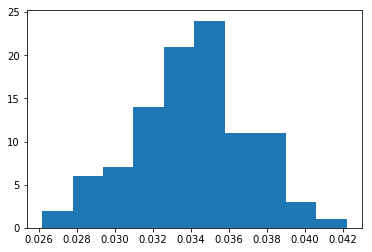

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(chains[:,0],10)

In [ ]:
for p in priors:
    
    print(p[0])
    if p[0] == 'normal':
        print 'printed'
    print(p[1])

In [ ]:
len(priors)